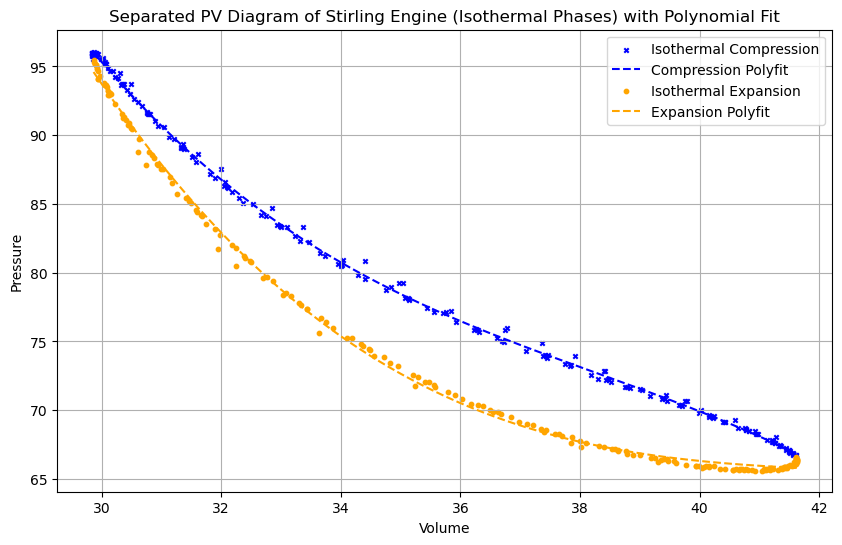

Work during compression: 924.04 J
Work during expansion: 870.98 J


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

data = pd.read_csv('Stirling_Engine_Data.csv')

# Identifying turning points where the volume changes direction
volume_diff = np.diff(data['Volume'])
turning_points = np.where(np.diff(np.sign(volume_diff)))[0] + 1

# Adding the first and last index to complete the cycle
turning_points = np.insert(turning_points, 0, 0)
turning_points = np.append(turning_points, len(data) - 1)

# Classifying data points into compression and expansion phases
compression_indices = []
expansion_indices = []

for i in range(len(turning_points) - 1):
    if i % 2 == 0:
        compression_indices.extend(range(turning_points[i], turning_points[i + 1]))
    else:
        expansion_indices.extend(range(turning_points[i], turning_points[i + 1]))

compression_data = data.iloc[compression_indices]
expansion_data = data.iloc[expansion_indices]

# Fit third-degree polynomial to data
compression_vol = compression_data['Volume']
compression_pres = compression_data['Pressure']
poly_coeff_compression = np.polyfit(compression_vol, compression_pres, 3)

expansion_vol = expansion_data['Volume']
expansion_pres = expansion_data['Pressure']
poly_coeff_expansion = np.polyfit(expansion_vol, expansion_pres, 3)

# Generate volume range for the fit curves
vol_range_compression = np.linspace(compression_vol.min(), compression_vol.max(), 500)
vol_range_expansion = np.linspace(expansion_vol.min(), expansion_vol.max(), 500)

# Generate polynomial fit values
compression_fit = np.polyval(poly_coeff_compression, vol_range_compression)
expansion_fit = np.polyval(poly_coeff_expansion, vol_range_expansion)

# Plotting the separated phases with polynomial fits
plt.figure(figsize=(10, 6))
plt.scatter(compression_data['Volume'], compression_data['Pressure'], label='Isothermal Compression', color='blue', marker='x', s = 10)
plt.plot(vol_range_compression, compression_fit, color='blue', linestyle='--', label='Compression Polyfit')
plt.scatter(expansion_data['Volume'], expansion_data['Pressure'], label='Isothermal Expansion', color='orange', marker='o', s = 10)
plt.plot(vol_range_expansion, expansion_fit, color='orange', linestyle='--', label='Expansion Polyfit')
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.title('Separated PV Diagram of Stirling Engine (Isothermal Phases) with Polynomial Fit')
plt.legend()
plt.grid(True)
plt.show()

# Formulate the polynomial equations
compression_poly_eq = f"Compression Polyfit: P(V) = {poly_coeff_compression[0]:.2e} * V^3 + {poly_coeff_compression[1]:.2e} * V^2 + {poly_coeff_compression[2]:.2e} * V + {poly_coeff_compression[3]:.2e}"
expansion_poly_eq = f"Expansion Polyfit: P(V) = {poly_coeff_expansion[0]:.2e} * V^3 + {poly_coeff_expansion[1]:.2e} * V^2 + {poly_coeff_expansion[2]:.2e} * V + {poly_coeff_expansion[3]:.2e}"

# Define the polynomial functions
def compression_poly(v):
    return poly_coeff_compression[0] * v**3 + poly_coeff_compression[1] * v**2 + poly_coeff_compression[2] * v + poly_coeff_compression[3]

def expansion_poly(v):
    return poly_coeff_expansion[0] * v**3 + poly_coeff_expansion[1] * v**2 + poly_coeff_expansion[2] * v + poly_coeff_expansion[3]

# Compute the work done for each phase
work_compression, _ = quad(compression_poly, compression_vol.max(), compression_vol.min())
work_expansion, _ = quad(expansion_poly, expansion_vol.max(), expansion_vol.min())

# Print the results
print(f'Work during compression: {-work_compression:.2f} J')
print(f'Work during expansion: {-work_expansion:.2f} J')